In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

os.chdir("asgn2")

In [27]:
def plot_data(filename, title, transform, xlabel, ylabel, calc = True):
    n = []
    t = []

    with open(filename) as f:
        for row in csv.reader(f, delimiter=','):
            n.append(int(row[0]))
            t.append(np.average(np.array(row[1:-1], dtype=float)) * 1e-9)
            
    n = np.array(n)
    t = np.array(t)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        
    ax1.scatter(n, t)
    ax1.set_xlabel("$N$")
    ax1.set_ylabel("$T$")
            
    ax2.scatter(*transform(n, t))
    ax2.yaxis.tick_right()
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)

    fig.suptitle(title + "\n $N$ = Size of Array, $T$ = Time in Seconds")
    
    if calc:
        fit(n, t)
    else:
        return n, t

def fit(n, t):
    m, b, r, p, std_err = stats.linregress(np.log(n), np.log(t))
    print(f"The slope of the line is {m:.2f} with a p-value of {p:.2f}.")
    print(f"The correlation coefficient is {r:.2f}.")
    print(f"The standard error is {std_err:.2f}.")
    print(f"The growth rate is {np.exp(b)} N^2.")
    print(f"In 5 minutes, an array of size {int(np.exp(np.log(5 * 60) - b / m))} can be sorted.")

The slope of the line is 1.96 with a p-value of 0.00.
The correlation coefficient is 1.00.
The standard error is 0.01.
The growth rate is 2.569075550043466e-10 N^2.
In 5 minutes, an array of size 24030170 can be sorted.


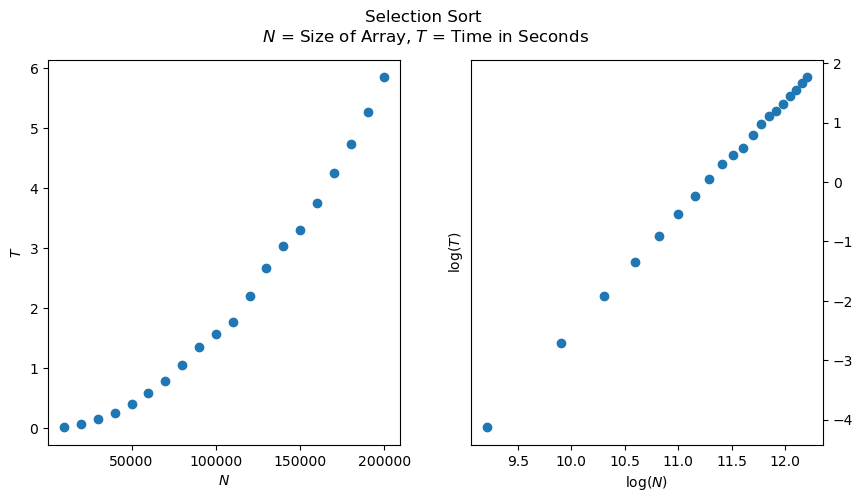

In [28]:
plot_data("selection_sort.csv", "Selection Sort", lambda n, t: (np.log(n), np.log(t)), "$\\log(N)$", "$\\log(T)$")

The slope of the line is 2.01 with a p-value of 0.00.
The correlation coefficient is 1.00.
The standard error is 0.01.
The growth rate is 9.272532488910909e-11 N^2.
In 5 minutes, an array of size 30026814 can be sorted.


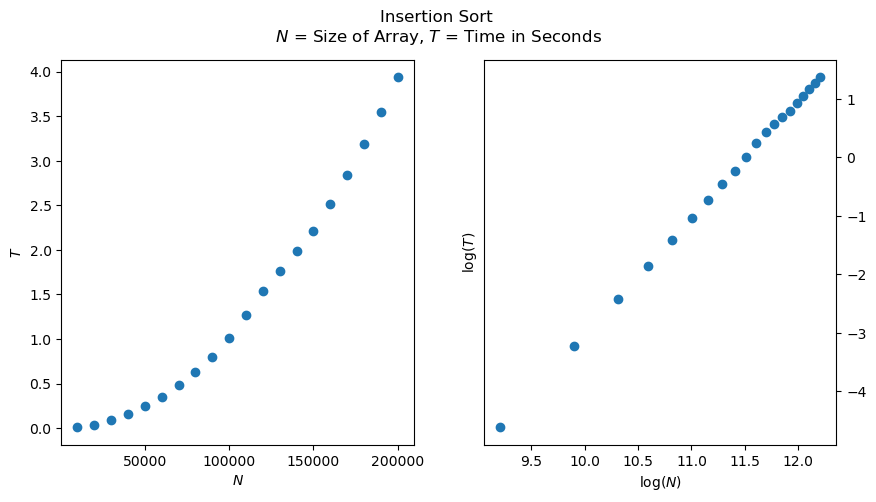

In [29]:
plot_data("insertion_sort.csv", "Insertion Sort", lambda n, t: (np.log(n), np.log(t)), "$\\log(N)$", "$\\log(T)$")

The growth rate is 7.840867244380915e-09 N log(N).
In 5 minutes, an array of size 1795570527 can be sorted.


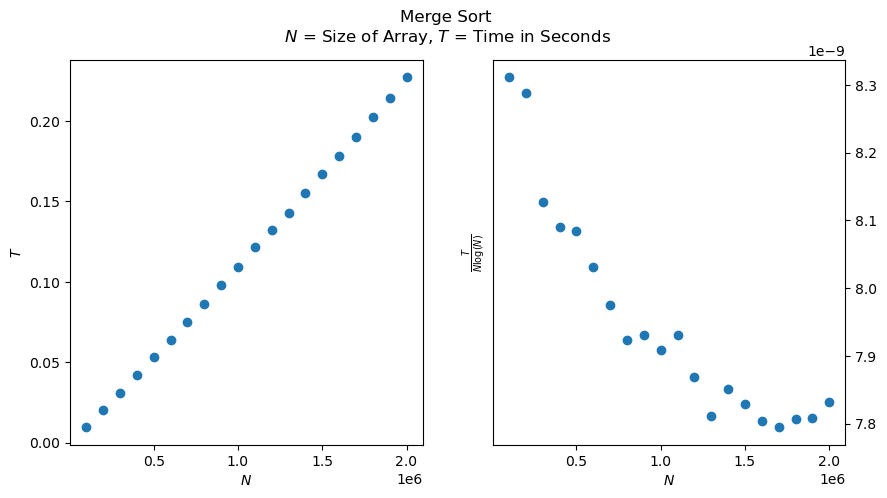

In [31]:
from scipy.optimize import curve_fit, fsolve

n, t = plot_data("merge_sort.csv", "Merge Sort", lambda n, t: (n, t / (n * np.log(n))), "$N$", "$\\frac{T}{N \\log(N)}$", False)

c = curve_fit(lambda n, a: a * n * np.log(n), n, t)[0][0]

print(f"The growth rate is {c} N log(N).")
print(f"In 5 minutes, an array of size {int(fsolve(lambda n: c * n * np.log(n) - 5 * 60, 1e9)[0])} can be sorted.")